<a href="https://colab.research.google.com/github/bruno2siqueira/Machine_Learning/blob/main/ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook demonstra como o ID3 utiliza o conceito de entropia para calcular o ganho de informação para construir uma Árvore de Decisão. O dataset é tirado do livro "Machine Learning" do Tom Mitchell e representa um problema fictício onde se deseja prever se um dia é bom para jogar tênis ou não, baseado em condições meteorológicas. O rótulo é a última coluna, com nome "play".

O código utiliza a biblioteca Pandas para manipular os dados. Uma das estruturas básicas do Pandas é um *dataframe*, que é uma representação de uma tabela que pode ser manipulada. Aqui, apenas usamos o dataframe para filtrar dados. 

In [ ]:
import io
import pandas as pd

In [ ]:
# Vamos primeiro criar e carregar os dados em um dataframe pandas

dadosRaw = """outlook,temp,humidity,windy,play
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,mild,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,mild,high,false,no
sunny,cool,normal,false,yes
rainy,mild,normal,false,yes
sunny,mild,normal,true,yes
overcast,mild,high,true,yes
overcast,hot,normal,false,yes
rainy,mild,high,true,no"""

dados = pd.read_csv(io.StringIO(dadosRaw))
dados

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


Começamos calculando o atributo que deve ir no nó raíz. Para tanto, o conjunto de dados disponível é a totalidade dos dados. Iremos calcular o ganho de informação para cada atributo.

In [ ]:
# Primeiro, definimos funções para calcular entropia e ganho de informação

# Cálculo da entropia para o conjunto de dados S
def entropia(S):
  p1 = len(S[S.play=='yes']) / len(S)
  p0 = 1 - p1
  if p0==0 or p1==0:
    return 0
  else:
    return -p0*np.log2(p0) - p1*np.log2(p1)

# Cálculo do ganho de informação para o atributo A e conjunto de dados S
def ganho(S,A):
  valores = S[A].unique()
  soma = 0
  for valor in valores:
    Sv = S[S[A]==valor]
    pv = len(Sv) / len(S)
    Ev = entropia(Sv)
    soma = soma + pv*Ev
  return entropia(S) - soma

In [ ]:
# Para cada atributo, calculamos o ganho de informação

atributos = ["outlook","temp","humidity","windy"]

S = dados
for A in atributos:
  print(A, end=': ')
  print(ganho(S,A))

outlook: 0.2467498197744391
temp: 0.029222565658954647
humidity: 0.15183550136234136
windy: 0.04812703040826927


Vemos que 'outlook' tem o maior ganho de informação e, portanto, esse passa a ser o atributo da raíz. Para cada valor possível de outlook (sunny, overcast, rainy), criamos um novo nó que tem acesso a todos exemplos para o qual o atributo outlook possui o valor associado e escolhemos um novo atributo para cada nó. A árvore até aqui tem o aspecto abaixo:

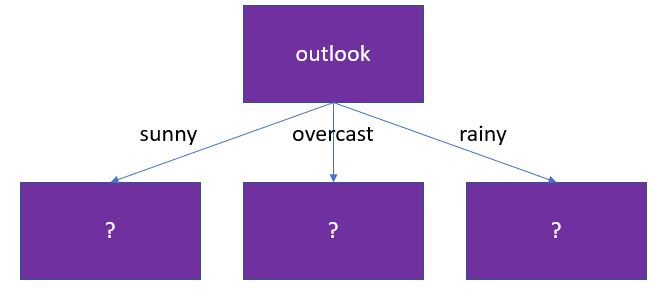




In [ ]:
# Vamos começar por outlook=='sunny', o nó mais a esquerda. 
# Filtramos os dados para apenas conteder os exemplos que possuem outlook=='sunny'

S = dados[dados.outlook=='sunny']
S

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [ ]:
# Vamos encontrar o atributo com o maior ganho de informação para o subconjunto de dados acima
# O atributo outlook é descartado agora, pois já foi utilizado neste caminho

atributos = ["temp","humidity","windy"]

for A in atributos:
  print(A, end=': ')
  print(ganho(S,A))

temp: 0.5709505944546686
humidity: 0.9709505944546686
windy: 0.01997309402197489


Vemos que o atributo 'humidity' tem o maior ganho de informação. Este então passa a ser o atributo do filho mais a esquerda da raíz, como abaixo. 

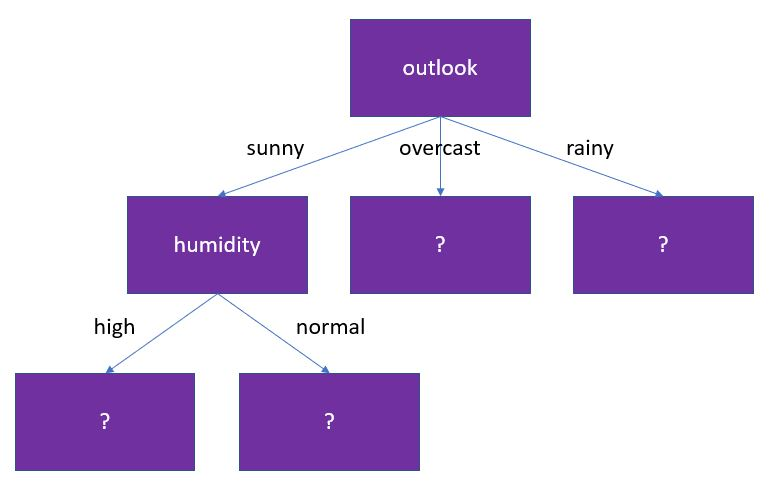

Podemos dar continuidade tanto para os demais valores de outlook como para os valores de humidity. Vamos seguir por humidity == 'high'.

In [ ]:
# Neste ponto da árvore, os exemplos disponíveis são os que tem outlook=='sunny' e humidity=='high'.

S = dados[(dados.outlook=='sunny') & (dados.humidity=='high')]
S

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


Observe como todos exemplos restantes tem play=='no'. Este é um dos critérios de parada do algoritmo e o nó deve ser substituído por uma folha contendo o rótulo 'no', como abaixo.

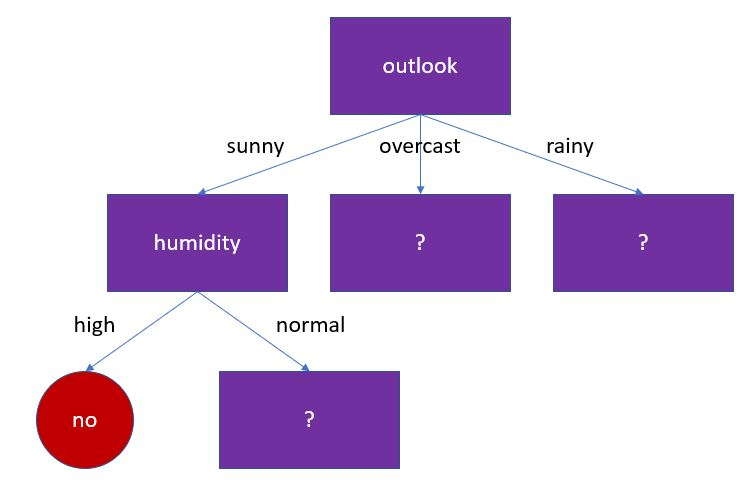

In [ ]:
# Caso onde humidity=='normal'
# Observe a seleção dos dados! Neste ponto da árvore, os exemplos disponíveis são os que tem outlook=='sunny' e humidity=='normal'.

S = dados[(dados.outlook=='sunny') & (dados.humidity=='normal')]
S

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


Para o filho direito de humidity, temos que todos exemplos são 'yes' e refletimos isso atribuindo a decisão 'yes' à folha.

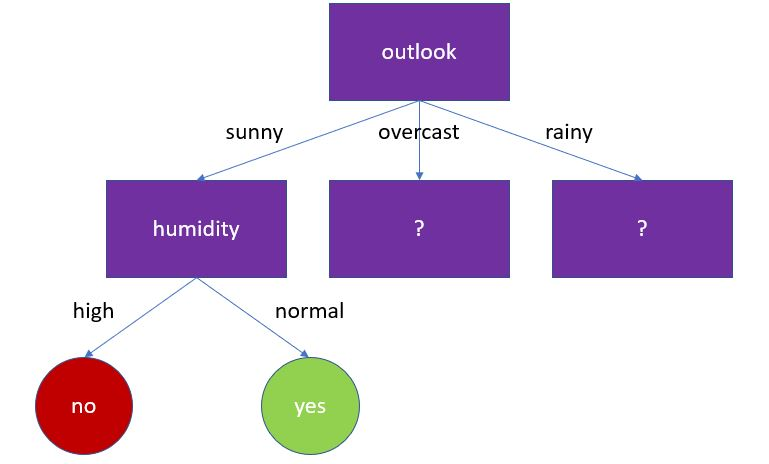

Vamos fazer mais um vértice, para outlook=='overcast'.

In [ ]:
# Caso onde outlook=='overcast'

S = dados[dados.outlook=='overcast']
S

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


Observamos que todos exemplos para outlook=='overcast' são 'yes'. Assim, não precisamos testar mais nenhum atributo neste caminho e atribuímos a uma folha a decisão.

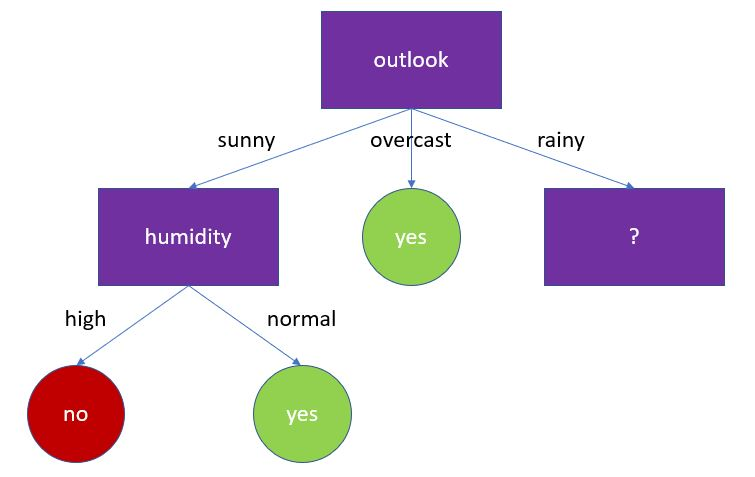

# Crie uma cópia deste notebook e complete a árvore.